In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.linear_model
import seaborn as sb

In [126]:
#Read file
search = pd.read_csv('Search data.csv')
display = pd.read_csv('display data.csv')
video = pd.read_csv('video data.csv')

In [127]:
# def createTimeSeriesComponent(data):
#     data['Date'] = pd.to_datetime(data['Date'])
#     data.set_index('Date', inplace=True)
#     data['Year'] = data.index.year
#     data['Month'] = data.index.month

In [128]:
# createTimeSeriesComponent(search)
# createTimeSeriesComponent(display)
# createTimeSeriesComponent(video)

In [129]:
def ExploratoryAnalysis(data):
    print "first 5 rows: \n" + str(data.head(5)) + "\n\n"
    print "statistical summary of data: \n\n" + str(data.describe()) + "\n\n"
    print "correlation: \n\n" + str(data.corr()) +"\n\n"
    columns = data.columns
    for i in range(0,len(columns)):
        print "columns " + str(columns[i]) + " has distinct values: \n" + str((data[columns[i]].value_counts())) + "\n\n"
    
    print "Pivot table: \n" +    str(pd.pivot_table(data, index = 'Month', aggfunc = np.sum)) + '\n\n'
    print "Graph: number of clicks distributed by Month \n" +  str(sb.factorplot( x='Month', y='Clicks', data=data, kind='bar', estimator = sum)) + "\n\n"
    print "Graph: spend distributed by Month \n" +  str(sb.factorplot( x='Month', y='Cost', data=data, kind='bar', estimator = sum)) + "\n\n"

first 5 rows: 
       Date  Month   Device Channel Campaign Type Media Type  Region  \
0  1/1/2013      1  Desktop  Google   Remarketing    Display  Global   
1  1/1/2013      1   Mobile  Google         Reach    Display  Global   
2  1/1/2013      1   Tablet  Google         Reach    Display  Global   
3  1/2/2013      1   Mobile  Google         Reach    Display  EMEA     
4  1/2/2013      1   Tablet  Google   Remarketing    Display  Global   

     Targeting     Cost  Clicks  
0  Remarketing  1074.74    3752  
1        Reach   845.78    1050  
2        Reach   420.80     350  
3        Reach    88.40     136  
4  Remarketing    17.06      82  


statistical summary of data: 

              Month          Cost         Clicks
count  40804.000000  40804.000000   40804.000000
mean       6.455249    446.403717     967.888589
std        3.304922   1041.130610    7847.806165
min        1.000000      0.020000       2.000000
25%        4.000000     26.000000      26.000000
50%        7.000000  

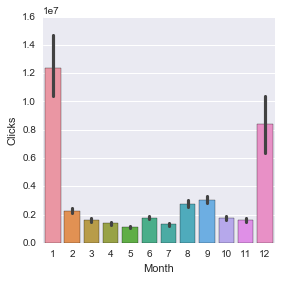

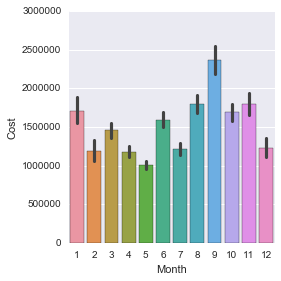

In [130]:

ExploratoryAnalysis(display)

In [106]:
# def createDummiesVariables(data):    
#     data = data.join(pd.get_dummies(data['Device'],prefix="Device"))
#     data = data.join(pd.get_dummies(data['Targeting'],prefix="Targeting"))
#     data = data.join(pd.get_dummies(data['Region'],prefix="Region"))
#     data = data.join(pd.get_dummies(data['Channel'],prefix="Channel"))
#     data = data.join(pd.get_dummies(data['Campaign Type'],prefix="Campaign Type"))
#     data = data.join(pd.get_dummies(data['Month'],prefix="Month"))  
#     return data

In [119]:
# createDummiesVariables(display)
print display.head()

       Date  Month   Device Channel Campaign Type Media Type  Region  \
0  1/1/2013      1  Desktop  Google   Remarketing    Display  Global   
1  1/1/2013      1   Mobile  Google         Reach    Display  Global   
2  1/1/2013      1   Tablet  Google         Reach    Display  Global   
3  1/2/2013      1   Mobile  Google         Reach    Display  EMEA     
4  1/2/2013      1   Tablet  Google   Remarketing    Display  Global   

     Targeting     Cost  Clicks  
0  Remarketing  1074.74    3752  
1        Reach   845.78    1050  
2        Reach   420.80     350  
3        Reach    88.40     136  
4  Remarketing    17.06      82  


In [120]:
    display = display.join(pd.get_dummies(display['Device'],prefix="Device"))
    display = display.join(pd.get_dummies(display['Targeting'],prefix="Targeting"))
    display = display.join(pd.get_dummies(display['Region'],prefix="Region"))
    display = display.join(pd.get_dummies(display['Channel'],prefix="Channel"))
    display = display.join(pd.get_dummies(display['Campaign Type'],prefix="Campaign Type"))
    display = display.join(pd.get_dummies(display['Month'],prefix="Month"))

In [121]:
display.count()

Date                                 40804
Month                                40804
Device                               40804
Channel                              40804
Campaign Type                        40804
Media Type                           40804
Region                               40804
Targeting                            40804
Cost                                 40804
Clicks                               40804
Device_Desktop                       40804
Device_Mobile                        40804
Device_Tablet                        40804
Device_Unknown                       40804
Targeting_Display                    40804
Targeting_Reach                      40804
Targeting_Remarketing                40804
Region_AMS                           40804
Region_APAC                          40804
Region_APAC                          40804
Region_EMEA                          40804
Region_EMEA                          40804
Region_Global                        40804
Region_LATA

In [96]:
video = video.join(pd.get_dummies(video['Campaign Type'],prefix="Campaign Type"))

video = video.join(pd.get_dummies(video['Device'],prefix="Device"))

video = video.join(pd.get_dummies(video['Targeting'],prefix="Targeting"))

video = video.join(pd.get_dummies(video['Region'],prefix="Region"))

video = video.join(pd.get_dummies(video['Channel'],prefix="Vendor"))

# video = video.join(pd.get_dummies(video['Month'],prefix="Month"))   